In [1]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A=pd.read_csv(r"C:\Users\SUKRUTI\Desktop\Market_Basket_Optimisation.csv")

In [3]:
A.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [5]:
A.describe

<bound method NDFrame.describe of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0     

In [6]:
Transcations = []
for i in range(0,7500):
    Transcations.append([str(A.values[i][j]) for j in range(0,20)])

In [8]:
trans_rules=apriori(Transcations,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)
results=list(trans_rules)
print(results[:50])

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]), RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]), RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=

In [14]:
def inspect(results):
    prod_1=[tuple(result[2][0][0])[0] for result in results]
    prod_2=[tuple(result[2][0][1])[0] for result in results]
    conf=[tuple(result[2][0][0])[0] for result in results]
    lift=[tuple(result[2][0][0])[0] for result in results]
    support=[tuple(result[2][0][0])[0] for result in results]
    return list(zip(prod_1, prod_2, support,lift,conf))

In [22]:
res_A = pd.DataFrame(inspect(results), columns = ['Prod_1', 'Prod_2', 'Support', 'Lift', 'Confidence'])
res_A.nlargest(n = 10, columns = 'Support')

TypeError: Column 'Support' has dtype object, cannot use method 'nlargest' with this dtype

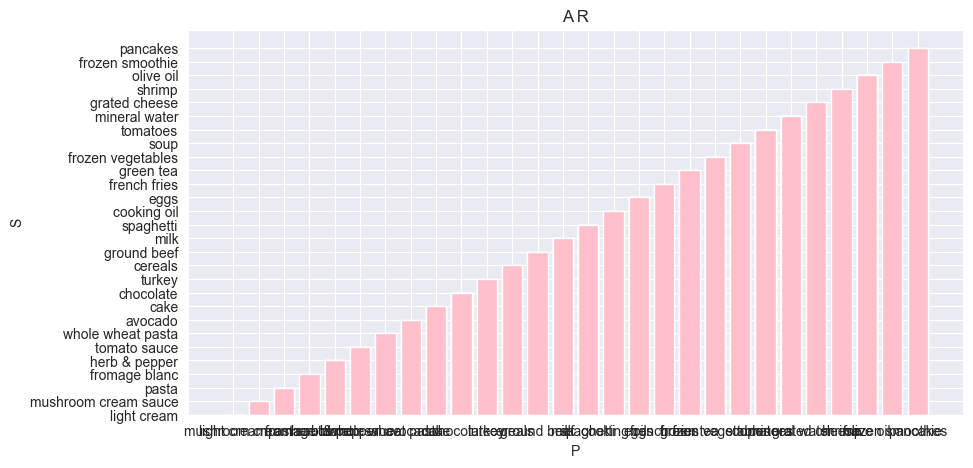

In [21]:
sb.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title("A R")
plt.xlabel("P")
plt.ylabel("S")
plt.bar(res_A['Prod_1'],res_A['Support'],color="pink")
plt.show()
              